# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [568]:
# Обозначим эмпирические данные молодых особей
alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

# Обозначим эмпирические данные взрослых особей
alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
# И размер выборки
Nmax = 30

### 2.2 Генерации стратегий

In [569]:
#rn.seed(10)

In [570]:
# # Старая версия генерации
# import random as rn
# import pandas as pd
# # Генерация параметров для стратегий
# # Запись параметров в data_strat
# def strategy(Nmax):
#     def rand_strat():
#         A, B = [], []
#         for i in range(0, Nmax):
#             a = rn.uniform(-D, 0)
#             b = rn.uniform(0, min(-a, a + D))
#             A.append(a)
#             B.append(b)
#             A.append(a)
#             B.append(-b)
#         return A, B
# 
#     A, B = rand_strat()
#     data_strat1 = {'Aj': A, 'Bj': B}
#     data1 = pd.DataFrame(data = data_strat1)
#     A, B = rand_strat()
#     data_strat2 = {'Aa': A, 'Ba': B}
#     data2 = pd.DataFrame(data = data_strat2)
#     data = pd.concat([data1, data2], axis=1)
#     data.to_csv("data_strat.csv", index=False)
#     return data
# data_strat = strategy(Nmax)
# data_strat

In [571]:
# Генерация с перемешиванием
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        rn.shuffle(A)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(0, min(-a[i], a[i] + D*100))
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-55.34,49.28,-49.71,3.84
1,-55.34,-49.28,-49.71,-3.84
2,-112.04,5.92,-20.44,7.11
3,-112.04,-5.92,-20.44,-7.11
4,-27.91,18.05,-43.10,40.14
5,-27.91,-18.05,-43.10,-40.14
6,-91.60,10.86,-70.35,12.26
7,-91.60,-10.86,-70.35,-12.26
8,-5.81,3.80,-59.11,12.04
9,-5.81,-3.80,-59.11,-12.04


In [572]:
#Aa = -49.2
#Aj = -5.4
#Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
#Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
#
#print(Ba)
#print(Bj)
#
#import numpy as np
#import matplotlib.pyplot as plt
#t = np.linspace(0, 1)
#x1 = Aj + Bj*np.cos(2*np.pi*t)
#x2 = Aa + Ba*np.cos(2*np.pi*t)
#plt.plot(t, x1, '-x') #Молодые
#plt.plot(t, x2, '-o') #Пожилые
#
#plt.show()
#
#Aa = -49.8
#Aj = -5.4
#Ba = -46.9
#Bj = -1.568
#x1 = Aj + Bj*np.cos(2*np.pi*t)
#x2 = Aa + Ba*np.cos(2*np.pi*t)
#plt.plot(t, x1, '-x') #Молодые
#plt.plot(t, x2, '-o') #Пожилые

In [573]:
# Генерация на основе эталонного графика 


### 2.3 Подсчет макропараметров и создание выборки

In [574]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров с обычными функциями окружающей среды
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*(np.pi*Bj[i])**2)
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*(np.pi*Ba[i])**2)
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
            collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
         collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))

   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [575]:
import pandas as pd
from collections import defaultdict
from sklearn.utils import shuffle
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = shuffle(data)
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [576]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()


In [577]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i) + '_n'] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
            data['M' + str(i) + 'M' + str(j) + '_n'] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,M5_n,M6_n,M7_n,M8_n,M1M1_n,M2M2_n,...,M7M5_n,M7M6_n,M8M1_n,M8M2_n,M8M3_n,M8M4_n,M8M5_n,M8M6_n,M8M7_n,target
0,0.276861,-0.438884,-0.808387,-0.254429,0.563497,-0.486086,0.211692,-0.677416,0.245716,0.485082,...,0.097256,-0.101863,-0.668185,0.877505,0.996518,0.473086,-0.699195,0.707263,-0.011287,1.0
1,-0.276861,0.438884,0.808387,0.254429,-0.563497,0.486086,-0.211692,0.677416,-0.245716,-0.485082,...,-0.097256,0.101863,0.668185,-0.877505,-0.996518,-0.473086,0.699195,-0.707263,0.011287,-1.0
2,0.501426,-0.719914,-0.806494,0.054057,0.938078,-0.965674,-0.033478,0.047404,0.334835,0.596253,...,-0.048884,0.037957,-0.613496,0.868046,0.974720,-0.120857,-0.737092,0.759784,0.057036,1.0
3,-0.501426,0.719914,0.806494,-0.054057,-0.938078,0.965674,0.033478,-0.047404,-0.334835,-0.596253,...,0.048884,-0.037957,0.613496,-0.868046,-0.974720,0.120857,0.737092,-0.759784,-0.057036,-1.0
4,0.238482,-0.496094,-0.725784,-0.254503,0.618330,-0.692524,0.004480,-0.702009,0.220611,0.520337,...,-0.029432,0.025370,-0.673687,0.899298,0.983846,0.475352,-0.714239,0.740716,0.048465,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,-0.712075,0.777296,0.121685,-0.244447,0.266489,-0.153059,0.324363,-0.312401,-0.511456,-0.617963,...,0.283529,-0.259537,0.159456,-0.169339,-0.027404,0.404426,-0.294778,0.279929,-0.099194,-1.0
3418,0.627107,-0.673176,-0.109711,0.055318,0.465741,-0.554058,-0.310105,0.404513,0.502566,0.604281,...,-0.288237,0.262415,-0.085789,0.080727,0.017414,-0.292110,-0.025166,0.026387,0.081289,1.0
3419,-0.627107,0.673176,0.109711,-0.055318,-0.465741,0.554058,0.310105,-0.404513,-0.502566,-0.604281,...,0.288237,-0.262415,0.085789,-0.080727,-0.017414,0.292110,0.025166,-0.026387,-0.081289,-1.0
3420,-0.084968,0.104120,0.011974,-0.189128,0.732231,-0.707117,0.014258,0.092112,-0.008890,-0.013682,...,-0.004708,0.002878,0.073667,-0.088612,-0.009990,0.112316,-0.319944,0.306316,-0.017906,1.0


In [578]:
""" import numpy as np
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
# Используем MinMaxScaler
# Запись данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   scaler = MinMaxScaler(feature_range=(-1,1))
   min_max = scaler.fit(data_param)
   data = scaler.transform(data_param)
   data = pd.DataFrame(data = data)
   data.to_csv("data_norm_with_target.csv", index=False)
   return data
   
data_norm = macro_norm(data_fit_macro_target)
data_norm """

' import numpy as np\nfrom collections import defaultdict\nfrom sklearn.preprocessing import MinMaxScaler\n# Используем MinMaxScaler\n# Запись данных в data_norm_with_target\ndef macro_norm(data_param):\n   target = data_param[\'target\'].tolist()\n   scaler = MinMaxScaler(feature_range=(-1,1))\n   min_max = scaler.fit(data_param)\n   data = scaler.transform(data_param)\n   data = pd.DataFrame(data = data)\n   data.to_csv("data_norm_with_target.csv", index=False)\n   return data\n   \ndata_norm = macro_norm(data_fit_macro_target)\ndata_norm '

### 2.4 Проверка корреляции

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:>

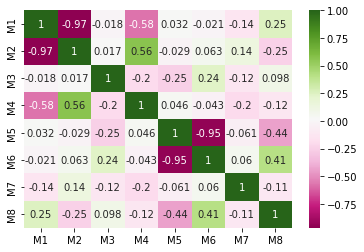

In [579]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

X = data_norm.drop('target', axis=1)
correlation = X[['M' + str(i) + '_n' for i in range(1, 9)]]
correlation.rename(columns={'M' + str(i) + '_n': 'M' + str(i) for i in range(1, 9)}, inplace=True)
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")

### 2.5 Реализация машинного обучения для SVM и LDA

In [580]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [581]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [582]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [583]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  0.9927007299270073
     LDA:  0.9868613138686131
Logloss:
     SVM:  0.01088071766596886
     LDA:  0.011416845774620961


### 2.6 Графики 

#### 2.6.1 Двумерные

In [584]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [585]:
""" # Вывод части графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 8):
    for j in range(i + 1, 7):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" # Вывод части графиков\nimport matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 8):\n    for j in range(i + 1, 7):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')\n        plt.xlim(-1,1)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 2.6.2 Трехмерные

In [586]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [587]:
# Вывод части графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(0, 5):
    for j in range(0, 4):
        for k in range(0, 3):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_norm.loc[:,'M1_n':'M8M7_n']\ny=data_norm.loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(0, 5):\n    for j in range(0, 4):\n        for k in range(0, 3):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.grid()\n            plt.show() "

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Частные производные

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 БЕ БЕ БЕ

In [588]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      s = gamma_a*M6
      p = alpha_j*M1 + betta_j*M3 + delta_j*M4
      q = gamma_j*M2
      r = alpha_a*M5 + betta_a*M7 + delta_a*M8
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR 

data = middle_SPQR(data_strat)
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
48,1.006019,-0.41796,0.118650,-0.007588,0.440172,-27.45,4.60,-23.92,16.82
42,0.971300,-0.39702,0.119360,-0.008531,0.442910,-13.74,0.76,-26.67,11.85
40,0.968024,-0.41756,0.083118,-0.005256,0.449215,-63.24,17.87,-16.93,2.64
41,0.948861,-0.40700,0.083118,-0.003826,0.449215,-63.24,-17.87,-16.93,-2.64
16,0.934749,-0.40640,0.076997,-0.007649,0.425035,-44.05,39.33,-30.48,24.16
54,0.926019,-0.38308,0.118228,-0.007438,0.387924,-29.21,4.36,-41.03,33.60
4,0.921357,-0.38788,0.111891,-0.008089,0.367261,-27.91,18.05,-43.10,40.14
32,0.913452,-0.40380,0.060335,-0.007270,0.447188,-51.52,44.79,-23.22,8.34
43,0.889524,-0.34962,0.119360,-0.008470,0.442910,-13.74,-0.76,-26.67,-11.85
49,0.889213,-0.35068,0.118650,-0.007220,0.440172,-27.45,-4.60,-23.92,-16.82


In [608]:
import pandas as pd
import numpy as np
z = 48
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
   s = gamma_a*M6[z]
   p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
   q = gamma_j*M2[z]
   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpp = (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hqq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hrr = -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

lam = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
empirical = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
empirical_8, empirical_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            empirical_8.append(empirical[i]*empirical[j])
for i in range(1, 8):
    for j in range(0, i):
        empirical_28.append(empirical[i]*empirical[j])
coef = empirical + empirical_8 + empirical_28

lam_LDA = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]

coef[0] = coef[0]*hp            #M1
coef[1] = coef[1]*hq            #M2
coef[2] = coef[2]*hp            #M3
coef[3] = coef[3]*hp            #M4
coef[4] = coef[4]*hr            #M5
coef[5] = coef[5]*hs            #M6
coef[6] = coef[6]*hr            #M7
coef[7] = coef[7]*hr            #M8
coef[8] = coef[8]*hpp           #M11
coef[9] = coef[9]*hqq           #M22
coef[10] = coef[10]*hpp         #M33
coef[11] = coef[11]*hpp         #M44
coef[12] = coef[12]*hrr         #M55
coef[13] = coef[13]*hss         #M66
coef[14] = coef[14]*hrr         #M77
coef[15] = coef[15]*hrr         #M88
coef[16] = coef[16]*hpq         #M21
coef[17] = coef[17]*hpp         #M31
coef[18] = coef[18]*hpq         #M32
coef[19] = coef[19]*hpp         #M41
coef[20] = coef[20]*hpq         #M42
coef[21] = coef[21]*hpp         #M43
coef[22] = coef[22]*hpr         #M51
coef[23] = coef[23]*hqr         #M52
coef[24] = coef[24]*hpr         #M53
coef[25] = coef[25]*hpr         #M54
coef[26] = coef[26]*hsp         #M61
coef[27] = coef[27]*hsq         #M62
coef[28] = coef[28]*hpq         #M63
coef[29] = coef[29]*hpq         #M64
coef[30] = coef[30]*hqr         #M65
coef[31] = coef[31]*hpr         #M71
coef[32] = coef[32]*hqr         #M72
coef[33] = coef[33]*hpr         #M73
coef[34] = coef[34]*hpr         #M74
coef[35] = coef[35]*hrr         #M75
coef[36] = coef[36]*hsr         #M76
coef[37] = coef[37]*hpr         #M81
coef[38] = coef[38]*hqr         #M82
coef[39] = coef[39]*hpr         #M83
coef[40] = coef[40]*hpr         #M84
coef[41] = coef[41]*hpr         #M85
coef[42] = coef[42]*hsr         #M86
coef[43] = coef[43]*hrr         #M87

df=pd.DataFrame([['hp',  hp/hr],
                 ['hq',  hq/hr],
                 ['hr',  hr/hr],
                 ['hs',  hs/hr],
                 ['hpp',hpp/hr],
                 ['hqq',hqq/hr],
                 ['hrr',hrr/hr],
                 ['hss',hss/hr],
                 ], 
    columns=['id','Тейлор'])
df

,id,Тейлор
0,hp,2.993016
1,hq,-0.716808
2,hr,1.000000
3,hs,-5.175476
4,hpp,-12.911447
5,hqq,1.801138
6,hrr,-0.485505
7,hss,1.801138


In [609]:
import pandas as pd
import numpy as np
z = 48
lam_1 = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   r = lam_1[4]*M5[z] + lam_1[6]*M7[z] + lam_1[7]*M8[z]
   s = lam_1[5]*M6[z]
   p = lam_1[0]*M1[z] + lam_1[2]*M3[z] + lam_1[3]*M4[z]
   q = lam_1[1]*M2[z]
   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpp = (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hqq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hrr = -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

df=pd.DataFrame([['hp',  hp/hr],
                 ['hq',  hq/hr],
                 ['hr',  hr/hr],
                 ['hs',  hs/hr],
                 ['hpp',hpp/hr],
                 ['hqq',hqq/hr],
                 ['hrr',hrr/hr],
                 ['hss',hss/hr],
                 ], 
    columns=['id','Тейлор'])
df

,id,Тейлор
0,hp,35.900480
1,hq,41.510018
2,hr,1.000000
3,hs,-0.135137
4,hpp,-2.249228
5,hqq,0.064198
6,hrr,0.011444
7,hss,0.064198


In [ ]:
lam = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
empirical = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
empirical_8, empirical_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            empirical_8.append(empirical[i]*empirical[j])
for i in range(1, 8):
    for j in range(0, i):
        empirical_28.append(empirical[i]*empirical[j])
coef = empirical + empirical_8 + empirical_28


coef[0] = coef[0]*hp
coef[1] = coef[1]*hq
coef[2] = coef[2]*hp
coef[3] = coef[3]*hp
coef[4] = coef[4]*hr
coef[5] = coef[5]*hs
coef[6] = coef[6]*hr
coef[7] = coef[7]*hr
coef[8] = coef[8]*hpp
coef[9] = coef[9]*hqq
coef[10] = coef[10]*hpp
coef[11] = coef[11]*hpp
coef[12] = coef[12]*hrr
coef[13] = coef[13]*hss
coef[14] = coef[14]*hrr
coef[15] = coef[15]*hrr
coef[16] = coef[16]*hpq
coef[17] = coef[17]*hpp
coef[18] = coef[18]*hpq
coef[19] = coef[19]*hpp
coef[20] = coef[20]*hpq
coef[21] = coef[21]*hpp
coef[22] = coef[22]*hpr
coef[23] = coef[23]*hqr
coef[24] = coef[24]*hpr
coef[25] = coef[25]*hpr
coef[26] = coef[26]*hsp
coef[27] = coef[27]*hsq
coef[28] = coef[28]*hpq
coef[29] = coef[29]*hpq
coef[30] = coef[30]*hqr
coef[31] = coef[31]*hpr
coef[32] = coef[32]*hqr
coef[33] = coef[33]*hpr
coef[34] = coef[34]*hpr
coef[35] = coef[35]*hrr
coef[36] = coef[36]*hsr
coef[37] = coef[37]*hpr
coef[38] = coef[38]*hqr
coef[39] = coef[39]*hpr
coef[40] = coef[40]*hpr
coef[41] = coef[41]*hpr
coef[42] = coef[42]*hsr
coef[43] = coef[43]*hrr


def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

print('Косинус между векторами =', cos_n(coef, lam))
    

Косинус между векторами = 0.9245779496321228


In [610]:
empirical = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
empirical_8, empirical_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            empirical_8.append(empirical[i]*empirical[j])
for i in range(1, 8):
    for j in range(0, i):
        empirical_28.append(empirical[i]*empirical[j])
coef = empirical + empirical_8 + empirical_28


#Вывод всех графиков
""" import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8M7_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* (coef[i]) / (coef[j]) * x, label='empirical', color='red')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """



""" for i in range(0, 8):
    print('M' + str(i + 1), coef[i])
print('---------------------------------')
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            print('M' + str(i + 1) + str(j + 1), empirical[i]*empirical[j])
print('---------------------------------')
for i in range(1, 8):
    for j in range(0, i):
        print('M' + str(i + 1) + str(j + 1), empirical[i]*empirical[j])
 """

" for i in range(0, 8):\n    print('M' + str(i + 1), coef[i])\nprint('---------------------------------')\nfor i in range(0, 8):\n    for j in range(0, 8):\n        if i == j:\n            print('M' + str(i + 1) + str(j + 1), empirical[i]*empirical[j])\nprint('---------------------------------')\nfor i in range(1, 8):\n    for j in range(0, i):\n        print('M' + str(i + 1) + str(j + 1), empirical[i]*empirical[j])\n "

Эмпирические
Молодые особи     -15.579001290899512 4.213091001640582
Взрослые особи    -85.37465915439141 -23.971516618541397
SVM
Молодые особи     -15.579001290899512 53.814802236196705
Взрослые особи    -85.37465915439141 21.605682366869683


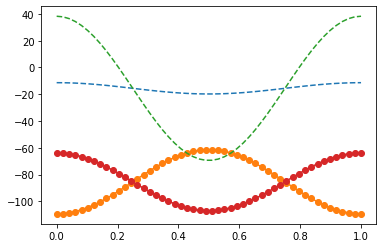

In [ ]:
alpha_1 = SVC_coef[0]/Max_M[0]/hp
gamma_1 = SVC_coef[1]/Max_M[1]/hq
betta_1 = SVC_coef[2]/Max_M[2]/hp
delta_1 = SVC_coef[3]/Max_M[3]/hp
alpha_2 = SVC_coef[4]/Max_M[4]/hr
gamma_2 = SVC_coef[5]/Max_M[5]/hs
betta_2 = SVC_coef[6]/Max_M[6]/hr
delta_2 = SVC_coef[7]/Max_M[7]/hr

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 
Aj = rn.uniform(-D, 0)
Aa = rn.uniform(-D, 0)

Bj = -(alpha_a*sigma1 - 2*delta_a*(Aj + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
x1 = Aj + Bj*np.cos(2*np.pi*t)

Ba = -(alpha_j*sigma1 - 2*delta_j*(Aa + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
x2 = Aa + Ba*np.cos(2*np.pi*t)

print('Эмпирические')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)



Bj = -(alpha_1*sigma1 - 2*delta_1*(Aj + D0))/(2*(4*(np.pi**2)*betta_1 + delta_1))
x3 = Aj + Bj*np.cos(2*np.pi*t)
Ba = -(alpha_2*sigma1 - 2*delta_2*(Aa + D0))/(2*(4*(np.pi**2)*betta_2 + delta_2))
x4 = Aa + Ba*np.cos(2*np.pi*t)

print('SVM')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)
plt.plot(t, x1, '--') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.plot(t, x3, '--') #Молодые
plt.plot(t, x4, '-o') #Пожилые
plt.show()

In [ ]:
from sympy import *

s, p, q, r = symbols('s p q r')
print(diff(diff(-s - p - q + (4*r*p + (p + q - s)**2)**(1/2), r), r))


-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5


In [ ]:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint
from scipy.optimize import LinearConstraint

def func(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    
    return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

def constr_f1(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    return -(4*r*p + (p + q - s)**2)

def constr_f2(v):
    Aj = v[0]
    # Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    return -min(Aj+D,-1*Aj) + np.abs(Bj)

def constr_f3(v):
    Aa = v[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    return -min(Aa+D,-1*Aa) + np.abs(Ba)


nlc1 = NonlinearConstraint(constr_f1, -np.inf, 0)
nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)

nlc=(nlc1,nlc2,nlc3)
bounds = ((-D, 0), (-D, 0))
result_DE = differential_evolution(func, bounds, constraints=(nlc))
result_DE

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


           constr: [array([0.]), array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -1.0828400811976415
              jac: [array([[ 0.00016987, -0.00589051]]), array([[ 1.36667903, -0.        ]]), array([[-0.        ,  1.95297267]]), array([[1., 0.],
       [0., 1.]])]
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 297
              nit: 13
          success: True
                x: array([-19.44152398,  -9.75933043])

Оптимизация DE
-9.759330433116956 9.759078353539683
-19.441523984029196 0.20478144392744435


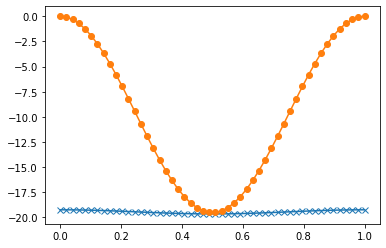

In [ ]:
Aj = result_DE.x[0]
Aa = result_DE.x[1]

Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 

x1 = Aj + Bj*np.cos(2*np.pi*t)
x2 = Aa + Ba*np.cos(2*np.pi*t)
print('Оптимизация DE')
print(Aa, Ba)
print(Aj, Bj)
plt.plot(t, x1, '-x') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.show()

In [ ]:
12222222222222222222222 asd

SyntaxError: invalid syntax (Temp/ipykernel_2244/1764362747.py, line 1)